In [7]:
from pycocotools.coco import COCO

In [22]:
dataDir = 'C:\\Users\\shour\\PycharmProjects\\COCO-HPC-Detector\\data\\coco'
dataType = 'val2014'
annFile = '{}\\annotations\\train&val\\instances_{}.json'.format(dataDir, dataType)
imageDir = '{}\\images\\{}'.format(dataDir, dataType)

# Initialize the COCO api for instance annotations
coco = COCO(annFile)


loading annotations into memory...
Done (t=8.24s)
creating index...
index created!


In [16]:
# Load category information for the given ID
catID = 15
print(coco.loadCats(ids=catID))

# Get image ID that satisfies the given filter conditions
imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
262148


In [17]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[247584, 576412, 642663, 1209372, 1251030, 1272930, 1277823, 1303789, 1307874, 1312222, 1312550, 1321181, 1324108, 1331011, 1332687, 1371763, 1372845, 1422576, 1837952, 1962686, 2007683, 2061640, 900100262148]


Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted

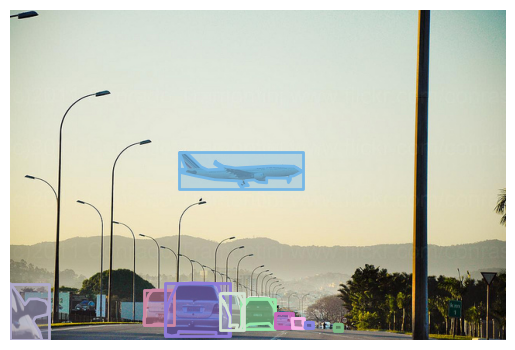

In [19]:
def main():
    # Category IDs.
    cat_ids = coco.getCatIds()
    print(f"Number of Unique Categories: {len(cat_ids)}")
    print("Category IDs:")
    print(cat_ids)  # The IDs are not necessarily consecutive.

    # All categories.
    cats = coco.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]
    print("Categories Names:")
    print(cat_names)

    # Category ID -> Category Name.
    query_id = cat_ids[0]
    query_annotation = coco.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]
    print("Category ID -> Category Name:")
    print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )

    # Category Name -> Category ID.
    query_name = cat_names[2]
    query_id = coco.getCatIds(catNms=[query_name])[0]
    print("Category Name -> ID:")
    print(f"Category Name: {query_name}, Category ID: {query_id}")

    # Get the ID of all the images containing the object of the category.
    img_ids = coco.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    # Pick one image.
    img_id = img_ids[2]
    img_info = coco.loadImgs([img_id])[0]
    img_file_name = img_info["file_name"]
    img_url = img_info["coco_url"]
    print(
        f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
    )

    # Get all the annotations for the specified image.
    ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    print(f"Annotations for Image ID {img_id}:")
    print(anns)

    # Use URL to load image.
    # im = Image.open(requests.get(img_url, stream=True).raw)
    # Load image from dataset
    im = plt.imread(imageDir + coco.loadImgs(img_id)[0]['file_name'])
    # Save image and its labeled version.
    plt.axis("off")
    plt.imshow(np.asarray(im))
    plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
    # Plot segmentation and bounding box.
    coco.showAnns(anns, draw_bbox=True)
    plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
    plt.show()
    return


if __name__ == "__main__":
    main()

C:\Users\shour\AppData\Local\Temp\ipykernel_5832\3307510526.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts, y=category_names, palette=colors)


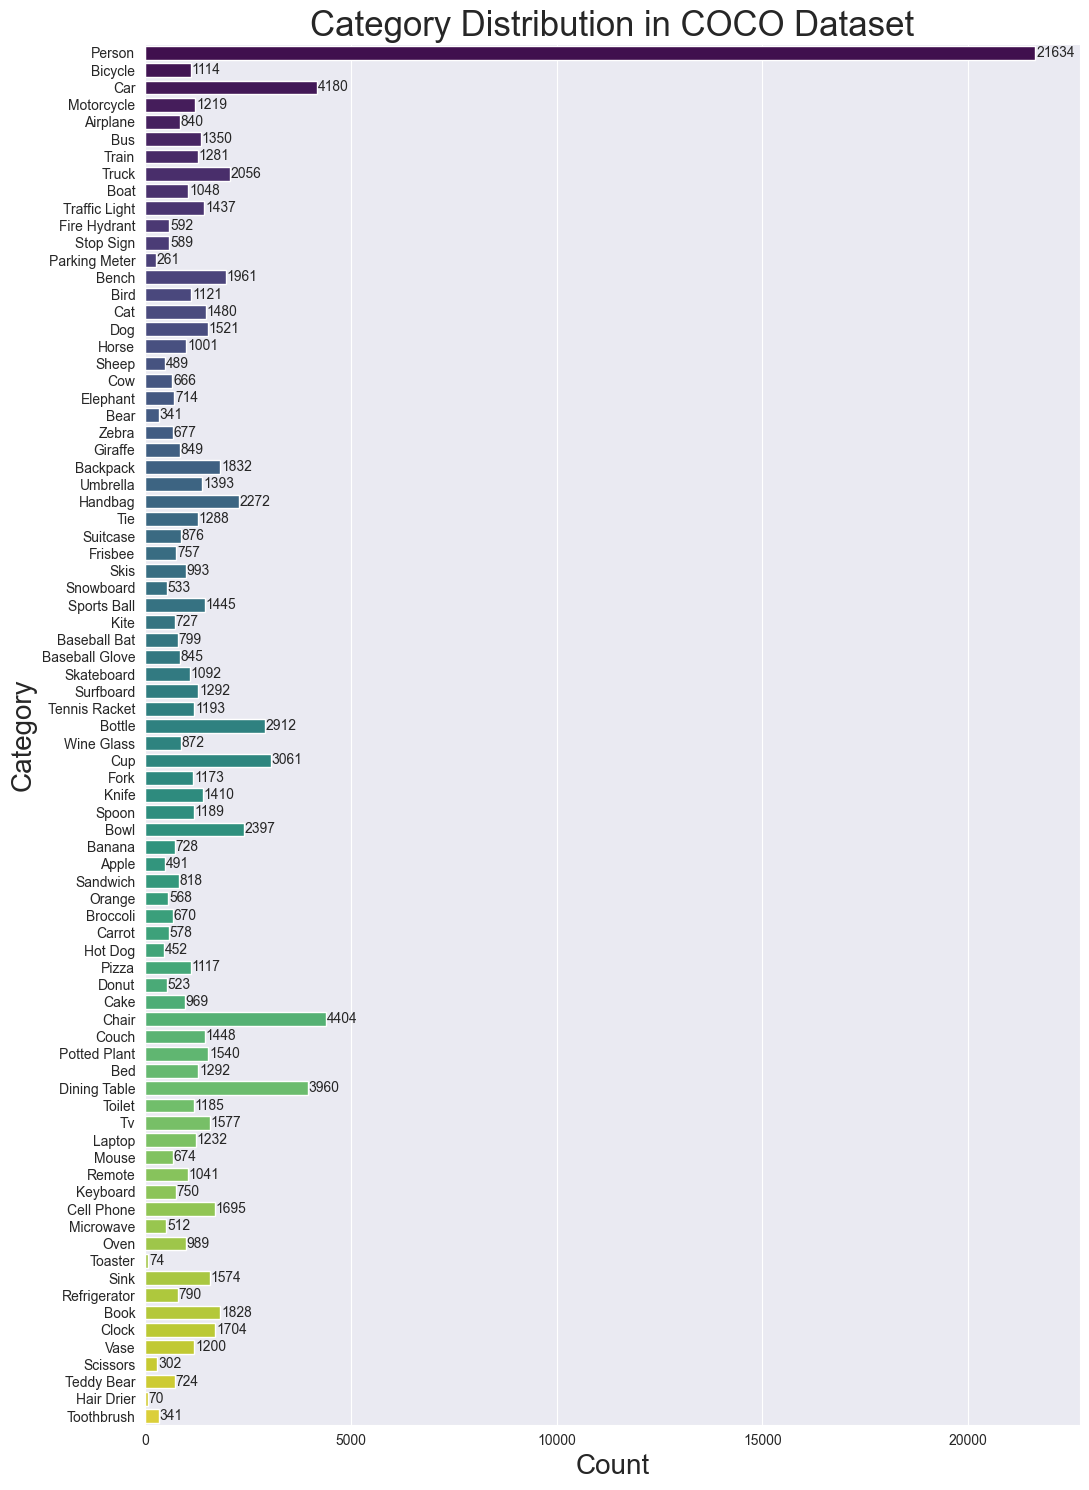

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

# Get category names
category_names = [cat['name'].title() for cat in cats]

# Get category counts
category_counts = [coco.getImgIds(catIds=[cat['id']]) for cat in cats]
category_counts = [len(img_ids) for img_ids in category_counts]

# Create a color palette for the plot
colors = sns.color_palette('viridis', len(category_names))

# Create a horizontal bar plot to visualize the category counts
plt.figure(figsize=(11, 15))
sns.barplot(x=category_counts, y=category_names, palette=colors)

# Add value labels to the bars
for i, count in enumerate(category_counts):
    plt.text(count + 20, i, str(count), va='center')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Category', fontsize=20)
plt.title('Category Distribution in COCO Dataset', fontsize=25)
plt.tight_layout()
# plt.savefig('coco-cats.png', dpi=300)
plt.show()

C:\Users\shour\AppData\Local\Temp\ipykernel_5832\1948121518.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_counts, y=sorted_names, palette=colors)


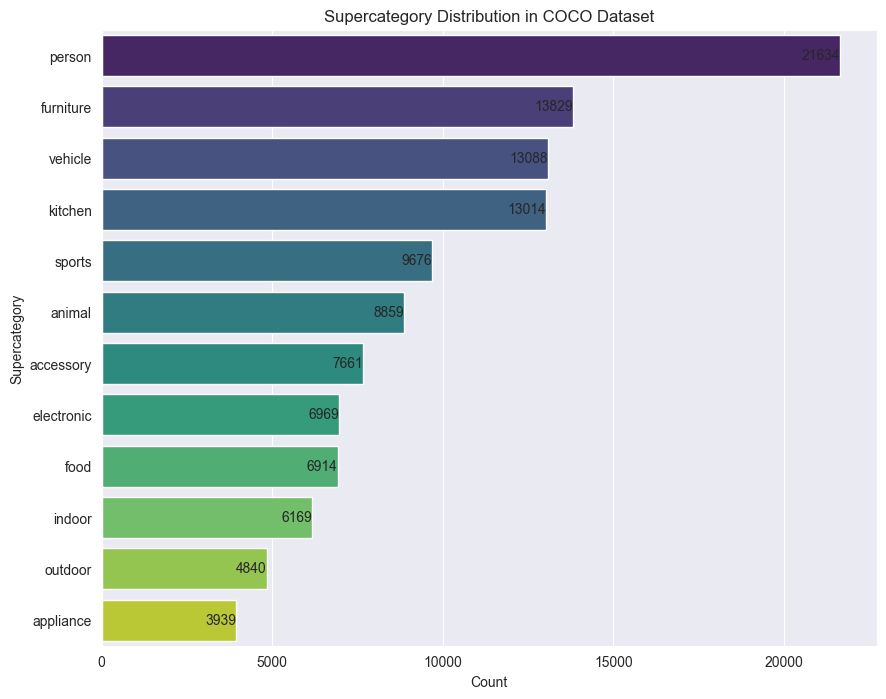

In [25]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Jupyter magic command to ensure plots are displayed inline in the notebook
%matplotlib inline

# Load the categories and their IDs
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)

# Aggregate counts by supercategory
supercategory_counts = {}
for cat in cats:
    supercategory = cat['supercategory']
    if supercategory not in supercategory_counts:
        supercategory_counts[supercategory] = 0
    supercategory_counts[supercategory] += len(coco.getImgIds(catIds=[cat['id']]))

# Sort supercategories by counts
sorted_supercats = sorted(supercategory_counts.items(), key=lambda x: x[1], reverse=True)
sorted_names, sorted_counts = zip(*sorted_supercats)

# Create a color palette for the plot
colors = sns.color_palette('viridis', len(sorted_names))

# Create a horizontal bar plot to visualize the supercategory counts
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.barplot(x=sorted_counts, y=sorted_names, palette=colors)

# Add value labels to the bars
for i, count in enumerate(sorted_counts):
    plt.text(count, i, str(count), va='center', ha='right')
plt.xlabel('Count')
plt.ylabel('Supercategory')
plt.title('Supercategory Distribution in COCO Dataset')
plt.savefig("SuperCatDistribution.png")

plt.show()


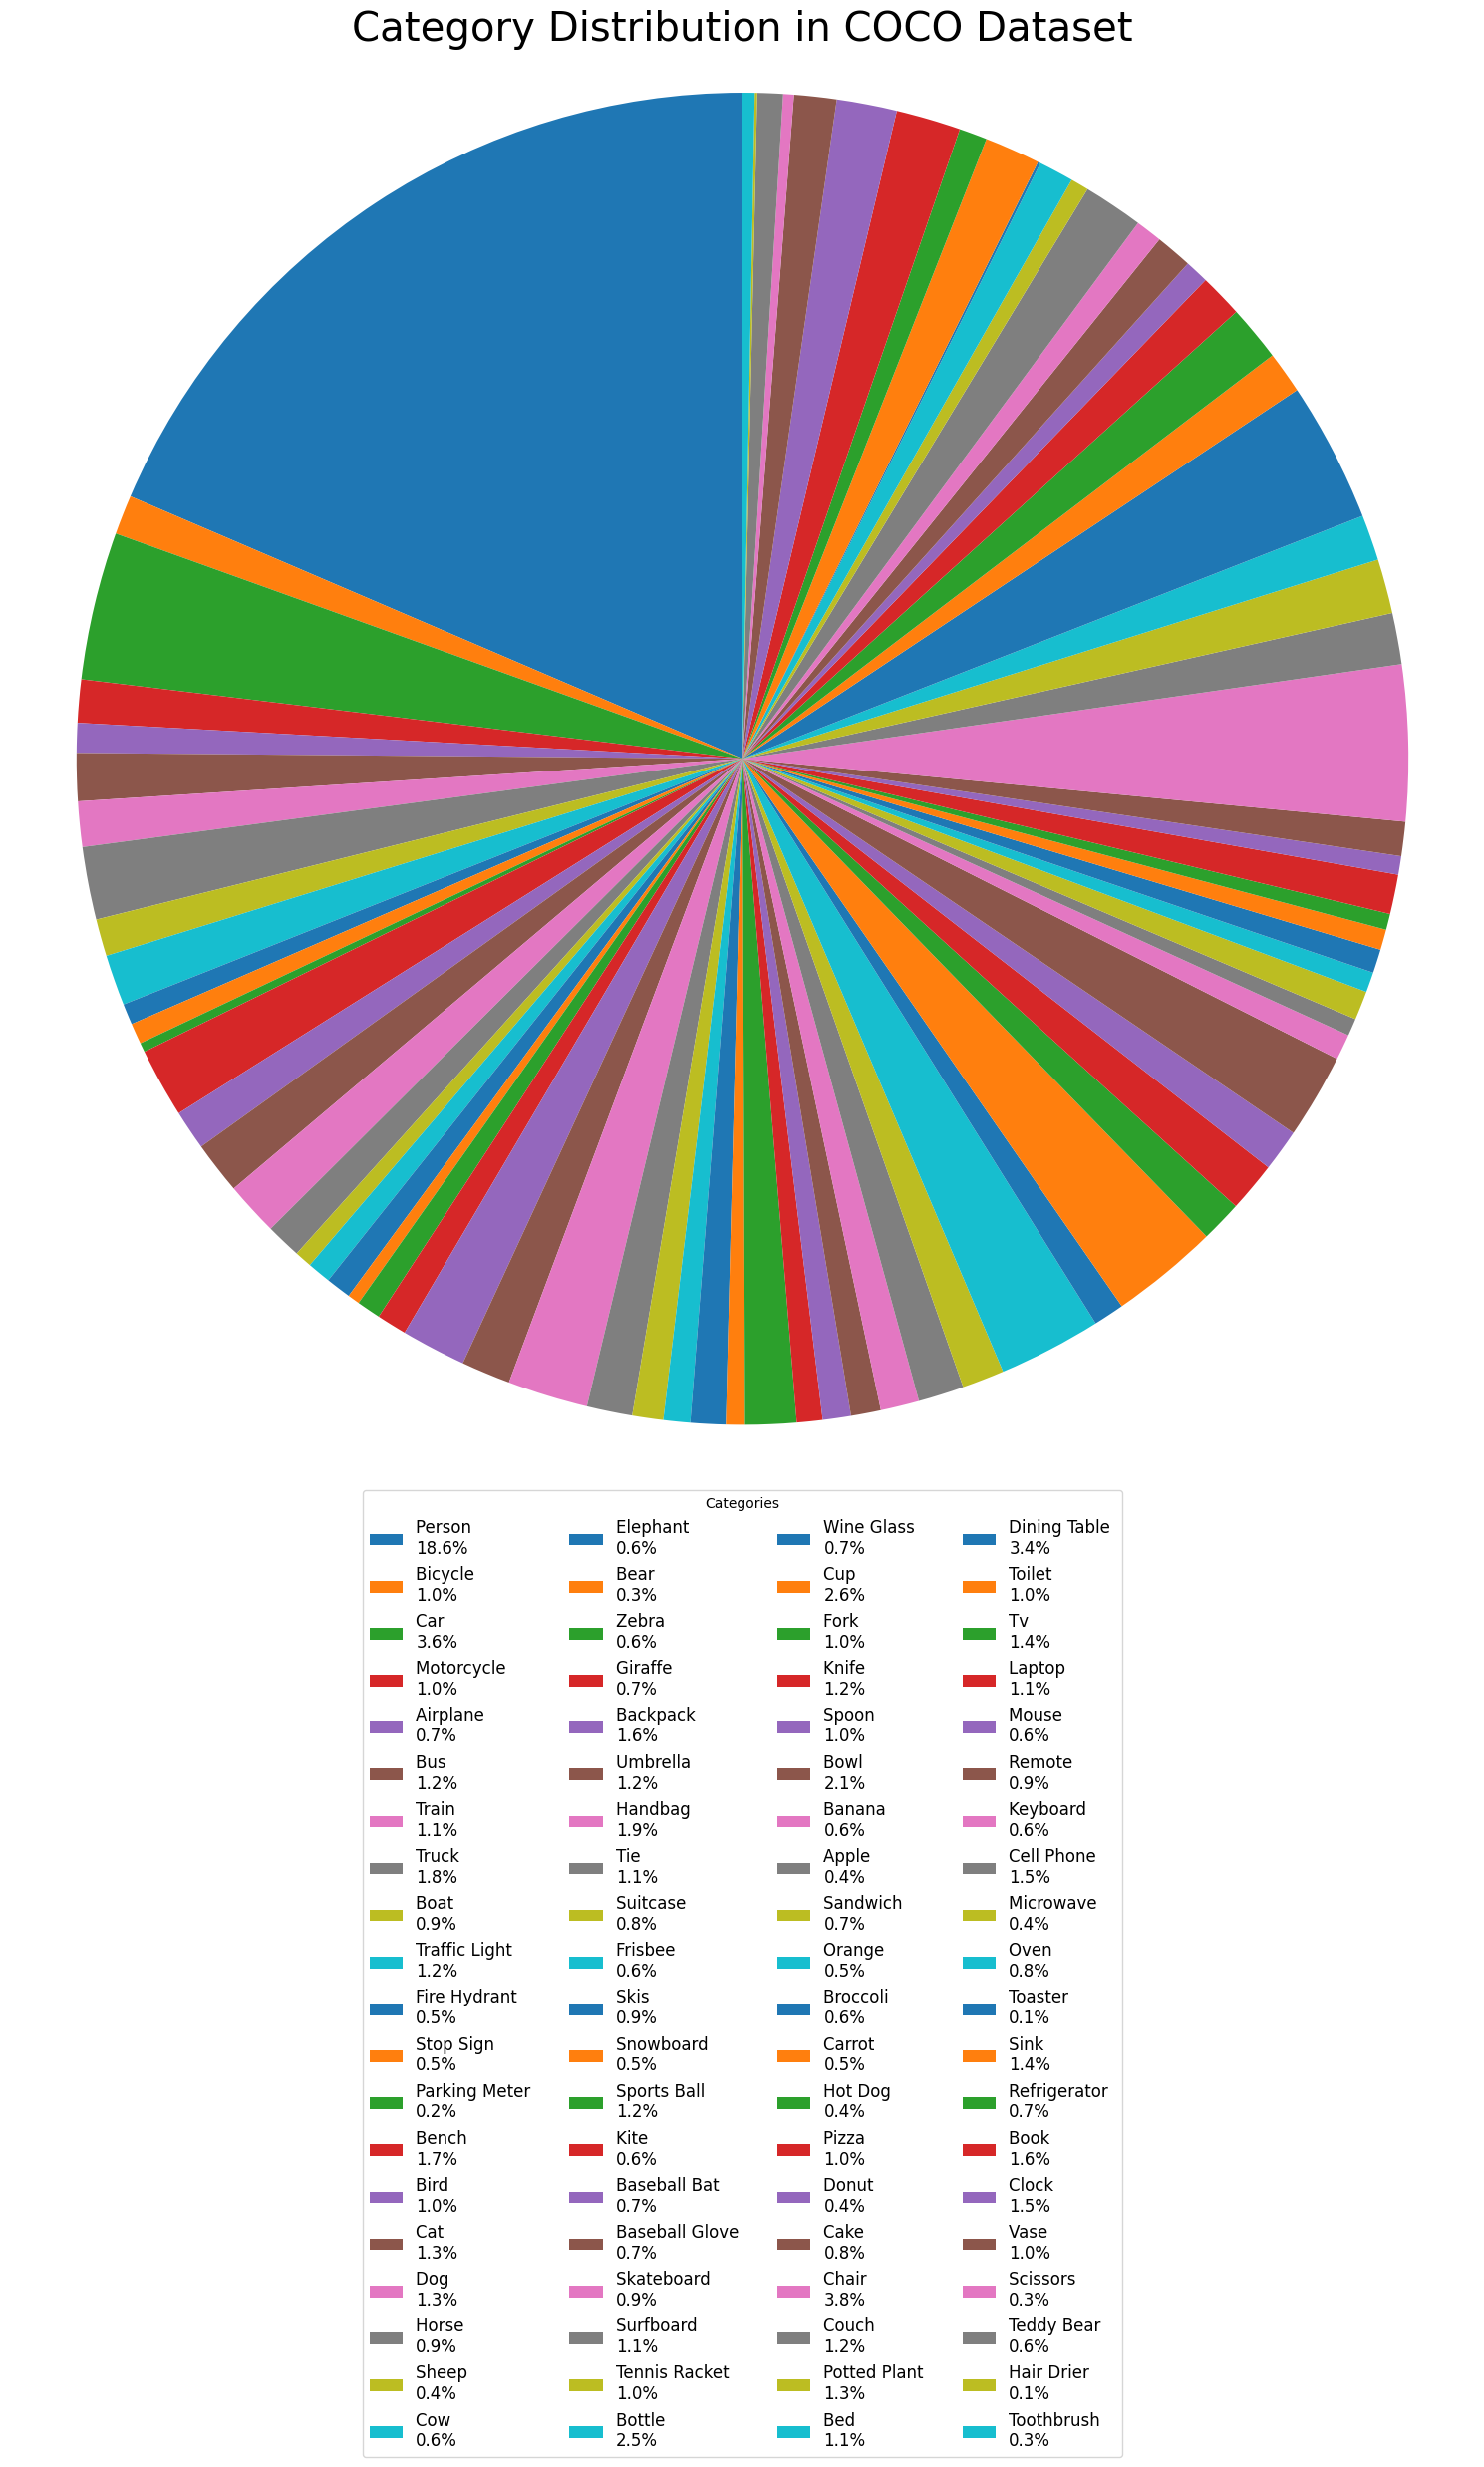

In [21]:
# Calculate percentage for each category
total_count = sum(category_counts)
category_percentages = [(count / total_count) * 100 for count in category_counts]

# Create a pie chart to visualize the category distribution
plt.figure(figsize=(15, 24.9))

# Customize labels properties
labels = [f"{name} " for name, percentage in zip(category_names, category_percentages)]
label_props = {
    "fontsize": 25,
    "bbox": {
        "edgecolor": "white",
        "facecolor": "white",
        "alpha": 0.7,
        "pad": 0.5
    }
}

# Add percentage information to labels, and set labeldistance to remove labels from the pie
wedges, _, autotexts = plt.pie(category_counts,
                               autopct='',
                               startangle=90,
                               textprops=label_props,
                               pctdistance=0.85)

# Create the legend with percentages
legend_labels = [f"{label}\n{category_percentages[i]:.1f}%" for i, label in enumerate(labels)]
plt.legend(wedges, legend_labels, title="Categories", loc="upper center", bbox_to_anchor=(0.5, -0.01),
           ncol=4, fontsize=12)

plt.axis('equal')
plt.title('Category Distribution in COCO Dataset', fontsize=29)
plt.tight_layout()
plt.savefig('coco-dis.png', dpi=300)
plt.show()

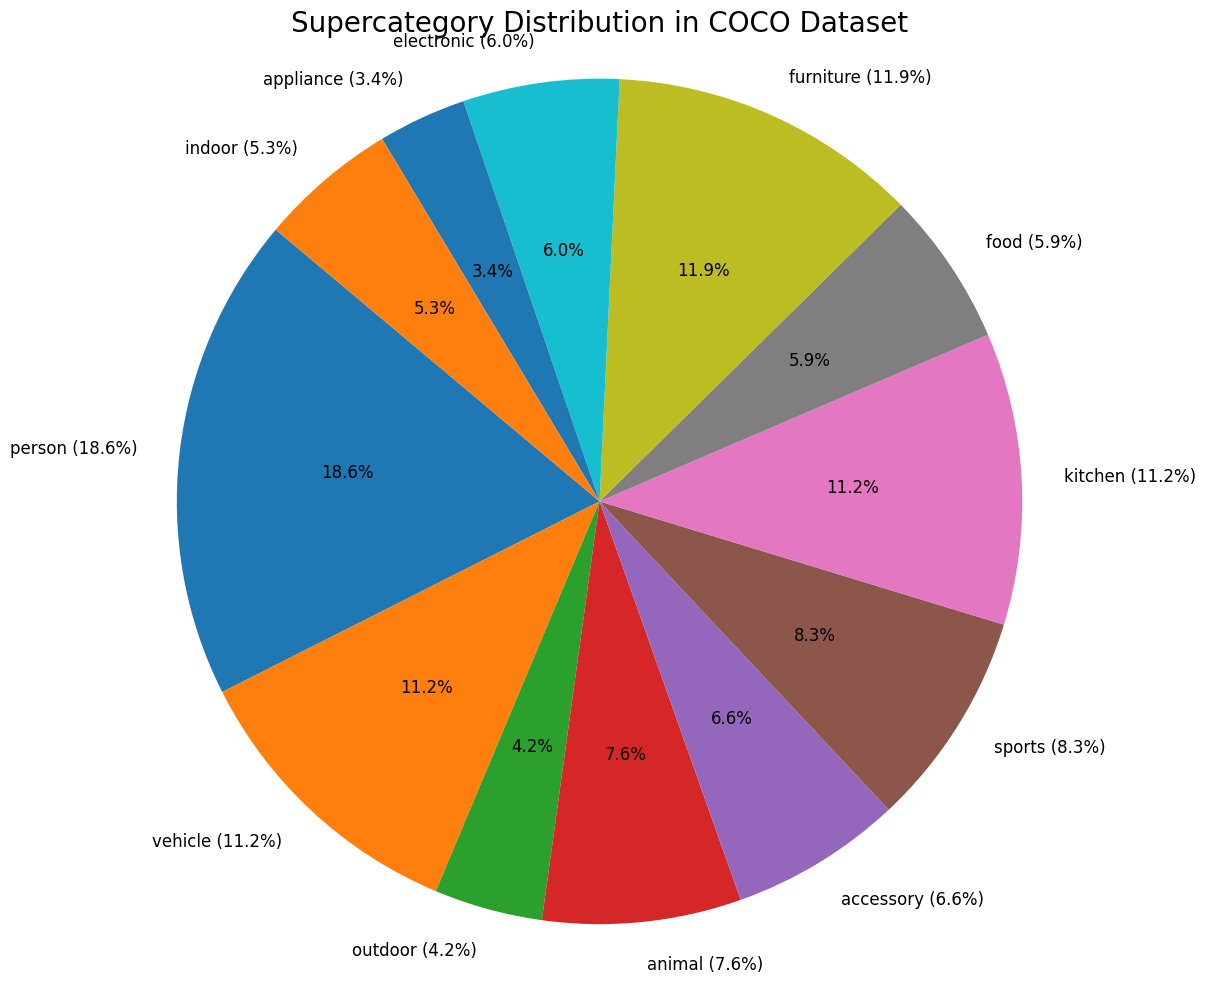

In [21]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Jupyter magic command for inline plotting (if you're using Jupyter Notebook)
%matplotlib inline

# Assuming 'coco' is your COCO object initialized with your dataset
# coco = COCO('path/to/your/annotations/instances_val2014.json')

# Load the categories and their IDs
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)

# Aggregate counts by supercategory
supercategory_counts = {}
for cat in cats:
    supercategory = cat['supercategory']
    if supercategory not in supercategory_counts:
        supercategory_counts[supercategory] = 0
    supercategory_counts[supercategory] += len(coco.getImgIds(catIds=[cat['id']]))

# Calculate percentage for each supercategory
total_count = sum(supercategory_counts.values())
supercategory_percentages = {key: (value / total_count) * 100 for key, value in supercategory_counts.items()}

# Create a pie chart
plt.figure(figsize=(12, 12))  # Adjust figure size as needed
labels = [f"{key} ({value:.1f}%)" for key, value in supercategory_percentages.items()]
sizes = list(supercategory_counts.values())
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

plt.axis('equal')
plt.title('Supercategory Distribution in COCO Dataset', fontsize=20)
plt.savefig("C:\\Users\\shour\\PycharmProjects\\COCO-HPC-Detector\\results\\SuperCatDistribution_PieChart.png")
plt.show()


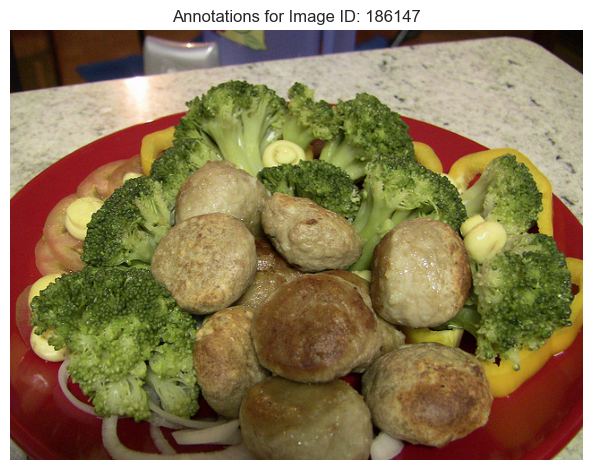

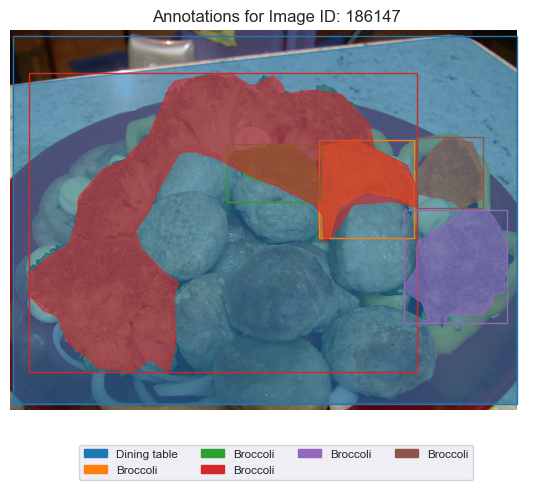

In [42]:
from matplotlib import patches
import numpy as np
import matplotlib

# Define the classes (out of the 80) which you want to see. Others will not be shown.
filterClasses = ['food']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)

# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)

# Load a random image from the filtered list
if len(imgIds) > 0:
    image_id = 186147
    image_info = coco.loadImgs(image_id)

    if image_info is not None and len(image_info) > 0:
        image_info = image_info[0]
        image_path = "C:\\Users\\shour\\PycharmProjects\\COCO-HPC-Detector\\data\\extra_data\\COCO_val2014_000000186147.jpg"

        # Load the annotations for the image
        annotation_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotation_ids)

        # Get category names and assign colors for annotations
        category_names = [coco.loadCats(ann['category_id'])[0]['name'].capitalize() for ann in annotations]
        category_colors = list(matplotlib.colors.TABLEAU_COLORS.values())

        # Load the image and plot it
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('Img.png', dpi=350)
        plt.show()

        plt.imshow(image)
        plt.axis('off')

        # Display bounding boxes and segmented colors for each annotation
        for ann, color in zip(annotations, category_colors):
            bbox = ann['bbox']
            segmentation = ann['segmentation']

            # Display bounding box
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,
                                     edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)

            # Display segmentation masks with assigned colors
            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                plt.fill(poly[:, 0], poly[:, 1], color=color, alpha=0.6)

        # Create a legend with category names and colors
        legend_patches = [patches.Patch(color=color, label=name) for color, name in
                          zip(category_colors, category_names)]
        plt.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.2), fontsize='small')

        # Show the image with legend
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('annImg.png', dpi=350)
        plt.show()
    else:
        print("No image information found for the selected image ID.")
else:
    print("No images found for the desired classes.")

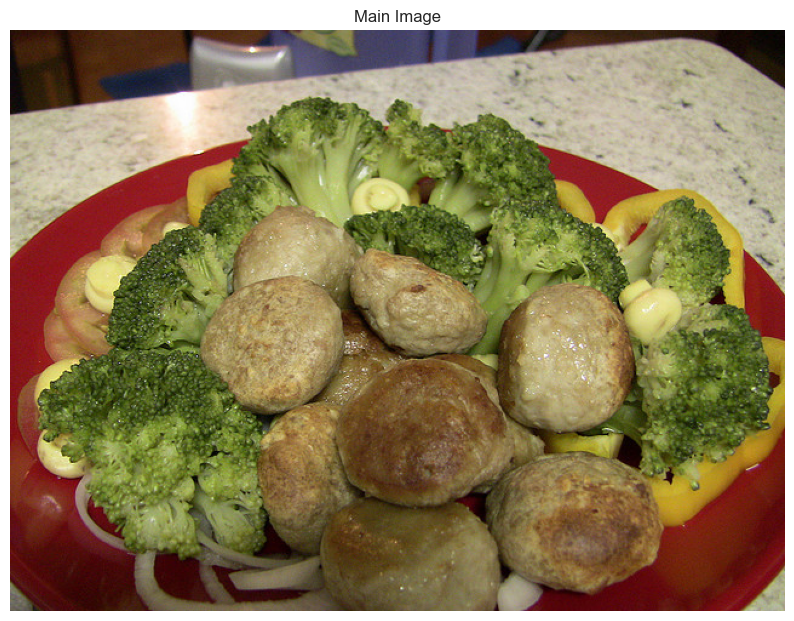

In [32]:
import os

# Retrieve image file path
image_info = coco.loadImgs(image_id)[0]
image_path = "C:\\Users\\shour\\PycharmProjects\\COCO-HPC-Detector\\data\\extra_data\\COCO_val2014_000000186147.jpg"

# Load the main image
main_image = plt.imread(image_path)

# Create a new figure for displaying the main image
plt.figure(figsize=(10, 10))
plt.imshow(main_image)
plt.axis('off')
plt.title('Main Image')

# Save the figures
plt.savefig('main_image.png', dpi=300)

# Show the plots
plt.show()

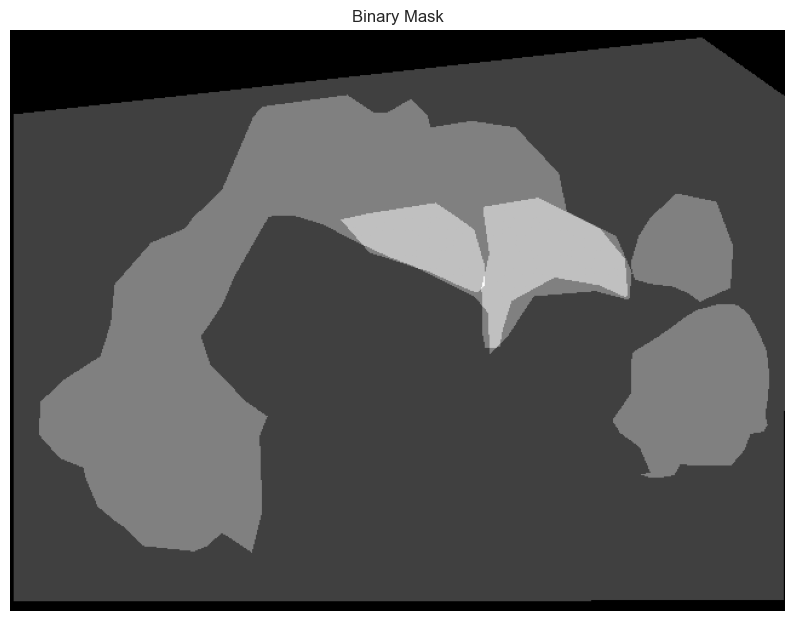

In [33]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty binary mask with the same dimensions as the image
binary_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the binary masks
for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)

    # Add the mask to the binary mask
    binary_mask += mask

# Display the binary mask
plt.figure(figsize=(10, 10))
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.title('Binary Mask')
# plt.savefig('binary_mask.png', dpi=300)
plt.show()

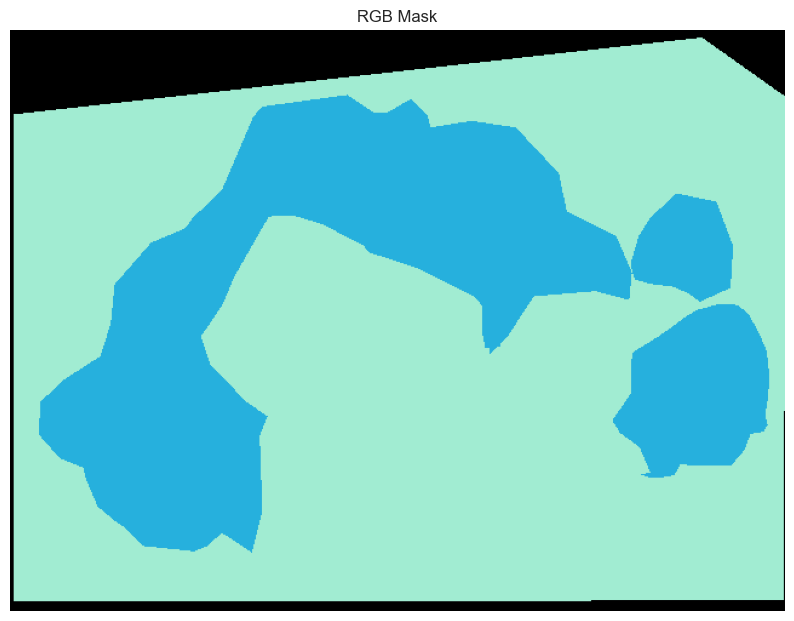

In [34]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty RGB mask with the same dimensions as the image
rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

# Define a color map for different object classes
color_map = {cat['id']: (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
             for cat in coco.loadCats(catIDs)}

# Iterate through the annotations and assign unique colors to each class/object
for annotation in annotations:
    category_id = annotation['category_id']
    color = color_map[category_id]

    # Draw the mask on the RGB mask
    mask = coco.annToMask(annotation)
    rgb_mask[mask == 1] = color

# Display the RGB mask
plt.figure(figsize=(10, 10))
plt.imshow(rgb_mask)
plt.axis('off')
plt.title('RGB Mask')
# plt.savefig('rgb_mask.png', dpi=300)
plt.show()

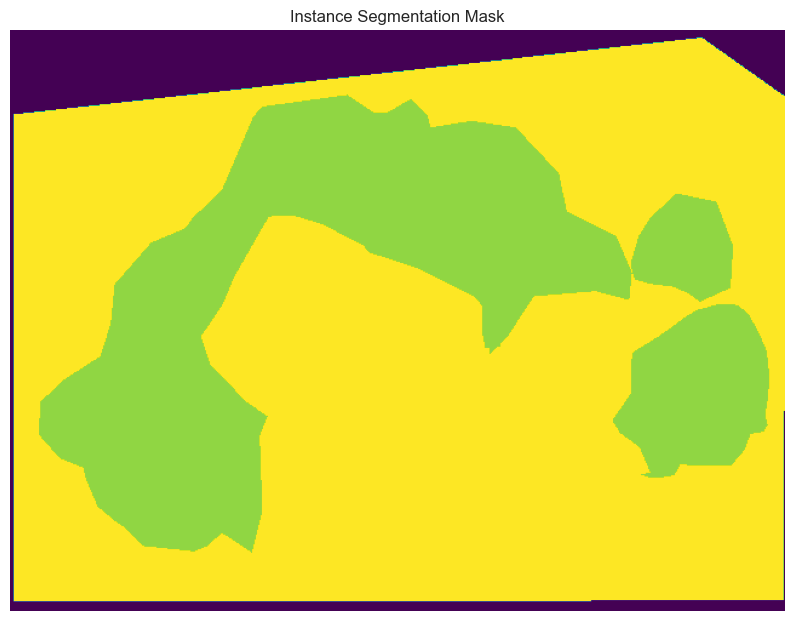

In [35]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty mask with the same dimensions as the image
instance_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the instance segmentation masks
for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)
    category_id = annotation['category_id']

    # Assign a unique value to each instance mask
    instance_mask[mask == 1] = category_id

# Display the instance segmentation mask
plt.figure(figsize=(10, 10))
plt.imshow(instance_mask, cmap='viridis')
plt.axis('off')
plt.title('Instance Segmentation Mask')
# plt.savefig('instance_mask.png', dpi=300)
plt.show()

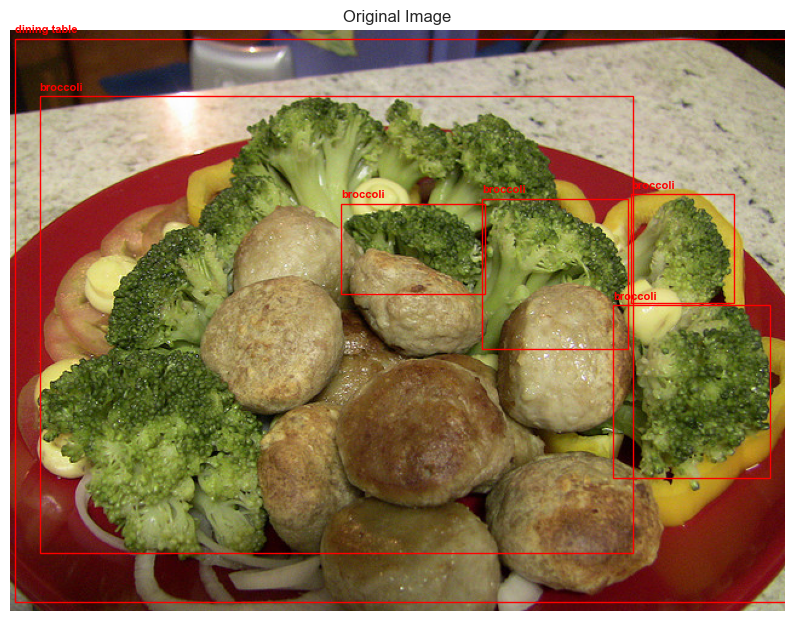

In [36]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create a new figure with the same dimensions as the image
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

# Display the original image
ax.imshow(main_image)
ax.axis('off')
ax.set_title('Original Image')

# Draw bounding boxes on the original image
for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']

    # Convert COCO bounding box format (x, y, width, height) to matplotlib format (xmin, ymin, xmax, ymax)
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    # Draw the bounding box rectangle
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Add the category name as a label above the bounding box
    ax.text(xmin, ymin - 5, category_name, fontsize=8, color='red', weight='bold')

# Save the figure with adjusted dimensions
# plt.savefig('bounding_boxes.png', bbox_inches='tight')

# Show the plot
plt.show()

C:\Users\shour\AppData\Local\Temp\ipykernel_5832\2890797117.py:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


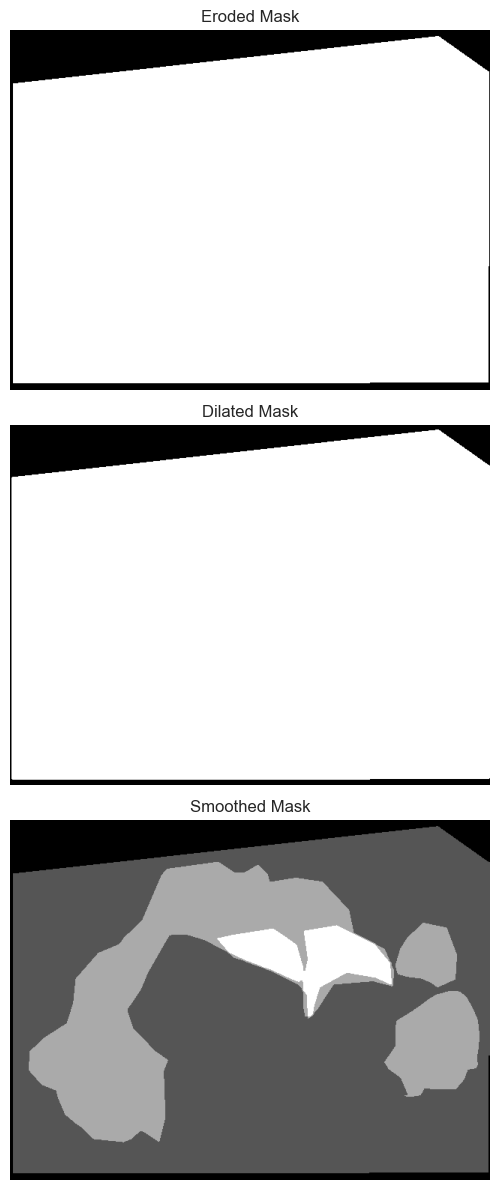

In [37]:
import numpy as np
from scipy.ndimage import binary_erosion, binary_dilation
from scipy.ndimage.filters import gaussian_filter

# Apply erosion to the binary mask
eroded_mask = binary_erosion(binary_mask)

# Apply dilation to the binary mask
dilated_mask = binary_dilation(binary_mask)

# Apply Gaussian blur to the binary mask
smoothed_mask = gaussian_filter(binary_mask, sigma=.2)

# Display the post-processed masks
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].imshow(eroded_mask, cmap='gray')
axes[0].set_title('Eroded Mask')
axes[0].axis('off')

axes[1].imshow(dilated_mask, cmap='gray')
axes[1].set_title('Dilated Mask')
axes[1].axis('off')

axes[2].imshow(smoothed_mask, cmap='gray')
axes[2].set_title('Smoothed Mask')
axes[2].axis('off')

plt.tight_layout()
# plt.savefig('post_processed_masks.png', dpi=300)
plt.show()

In [38]:
import numpy as np

# Ground truth mask
gt_mask = binary_mask.astype(bool)  # Example ground truth mask

# Predicted mask
predicted_mask = smoothed_mask.astype(bool)  # Example predicted mask

# Calculate Intersection over Union (IoU)
intersection = np.logical_and(gt_mask, predicted_mask)
union = np.logical_or(gt_mask, predicted_mask)
iou = np.sum(intersection) / np.sum(union)

# Print the IoU score
print(f"Intersection over Union (IoU): {iou:.4f}")

Intersection over Union (IoU): 0.9930


In [40]:
# Select an image ID for visualization
image_id = image_ids[0]

# Load the image
image_info = coco.loadImgs(image_id)[0]
image_path = "C:\\Users\\shour\\PycharmProjects\\COCO-HPC-Detector\\data\\extra_data\\COCO_val2014_000000186147.jpg"
image = plt.imread(image_path)

# Get the ground truth annotations for the image
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)

# Create a blank image for overlaying the masks
overlay = image.copy()

# Iterate over the annotations and draw the masks on the overlay image
for annotation in annotations:
    # Get the segmentation mask
    mask = coco.annToMask(annotation)

    # Choose a random color for the mask
    color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)

    # Apply the mask to the overlay image
    overlay[mask == 1] = color

# Create a figure and subplot for visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

# Plot the image with overlay masks
ax2.imshow(overlay)
ax2.set_title('Masks Overlay')
ax2.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the visualization as an image file
# plt.savefig('mask_visualization.png', dpi=300)

# Show the plot
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 360

In [34]:
from PIL.Image import Image
from tensorflow import keras

# Load paths for the COCO dataset annotation files
ANNOTATION_FILE_TRAIN = '/Users/pushpitkaushik/Downloads/coco2014/annotations/instances_train2014.json'
ANNOTATION_FILE_VAL = '/Users/pushpitkaushik/Downloads/coco2014/annotations/instances_val2014.json'

# Define the object classes of interest
classes = ['person']

# Initialize COCO instances for training set and load relevant data
coco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)
imgDict_train = coco_train.loadImgs(imgIds_train)

# Initialize COCO instances for validation set and load relevant data
coco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)
imgDict_val = coco_val.loadImgs(imgIds_val)

# Print the number of training and validation images and categories
print(len(imgIds_train), len(catIds_train))
print(len(imgIds_val), len(catIds_val))

# Shuffle the training and validation image IDs
shuffle(imgIds_train)
shuffle(imgIds_val)

# Select a subset of validation image IDs
imgIds_val = imgIds_val[0:600]
imgIds_train = imgIds_train[0:6000]
# Generate the list of file names for training and validation person images
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Print the number of training and validation person images
print(len(train_images_person), len(val_images_person))

# Generate the list of file names for training person images
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]

# Generate the list of file names for validation person images
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Check the number of files in the validation images directory
len(os.listdir("/Users/pushpitkaushik/Downloads/coco2014/images/val2014"))

# Create a directory to store the generated training masks
!mkdir/Users/pushpitkaushik/Downloads/coco2014/mask_train_2014

# Initialize a count variable
count = 0

# Generate the masks for training images
for ID in imgIds_train:

    # Set the file path for the mask
    file_path = "/Users/pushpitkaushik/Downloads/coco2014/mask_train_2014/COCO_train2014_{0:012d}.jpg".format(ID)

    # Retrieve a random image ID from the training set
    sampleImgIds = coco_train.getImgIds(imgIds=[ID])
    sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)
    count = count + 1

# Create a directory to store the generated validation masks
!mkdir/Users/pushpitkaushik/Downloads/coco2014/mask_val_2014

# Reset the count variable
count = 0

# Generate the masks for validation images
for ID in imgIds_val:

    # Set the file path for the mask
    file_path = "/Users/pushpitkaushik/Downloads/coco2014/mask_val_2014/COCO_val2014_{0:012d}.jpg".format(ID)

    # Retrieve a random image ID from the validation set
    sampleImgIds = coco_val.getImgIds(imgIds=[ID])
    sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)

    count = count + 1


class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        """
        CustomDataGenerator class for generating batches of preprocessed images and masks.

        Args:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.

        Attributes:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.
            image_filenames (list): List of matching filenames between images and masks.
            mask_filenames (list): List of matching filenames between masks and images.
        """
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        """
        Get the list of matching filenames between images and masks.

        Returns:
            list: List of matching filenames.
        """
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        """
        Get the number of batches in the generator.

        Returns:
            int: Number of batches.
        """
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        """
        Get a batch of preprocessed images and masks.

        Args:
            idx (int): Batch index.

        Returns:
            tuple: Batch of preprocessed images and masks.
        """
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Check if image and mask have the same dimensions
            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            # Resize the images and masks to size 128x128
            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            # Convert the images and masks to arrays
            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            # Check if image has 3 channels and shape of (128, 128, 3)
            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                # Normalize the pixel values if needed
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                # Append the preprocessed images and masks to the batch
                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        # Convert the batch images and masks to numpy arrays and return
        return np.array(batch_images), np.array(batch_masks)


# Usage
images_path = '/Users/pushpitkaushik/Downloads/coco2014/images/train2014'
masks_path = '/Users/pushpitkaushik/Downloads/coco2014/mask_train_2014'
batch_size = 8

# Create an instance of the CustomDataGenerator
train_generator = CustomDataGenerator(images_path, masks_path, batch_size)


loading annotations into memory...
Done (t=4.55s)
creating index...
index created!
loading annotations into memory...
Done (t=2.11s)
creating index...
index created!
45174 1
21634 1
6000 600


In [ ]:
def validate_image_shapes(generator):
    """
    Print the shapes of preprocessed images generated by the provided generator.

    Args:
        generator (CustomDataGenerator): Instance of the CustomDataGenerator class.
    """
    for i in range(len(generator)):
        # Get a batch of preprocessed images from the generator
        batch_images, _ = generator[i]

        # Print the shapes of the preprocessed images
        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")


validate_image_shapes(train_generator)

In [36]:
# Print the number of files in the train2014 directory containing original images
print(len(os.listdir("/Users/pushpitkaushik/Downloads/coco2014/images/train2014")))

# Print the number of files in the mask_train_2014 directory containing generated masks
print(len(os.listdir("/Users/pushpitkaushik/Downloads/coco2014/mask_train_2014")))

# Print the number of files in the val2014 directory containing original images
print(len(os.listdir("/Users/pushpitkaushik/Downloads/coco2014/images/val2014")))

# Print the number of files in the mask_val_2014 directory containing generated masks
print(len(os.listdir("/Users/pushpitkaushik/Downloads/coco2014/mask_val_2014")))


82783
6000
40458
600


Mask Image Shape: (424, 640)
Main Image Shape: (424, 640, 3)


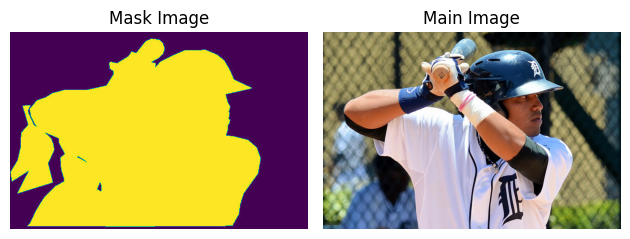

In [37]:
# Get the list of mask filenames
mask_filenames = [filename for filename in os.listdir(masks_path) if filename.endswith('.jpg')]

# Assuming the first image in the mask folder is the one to plot
first_mask_filename = mask_filenames[0]
image_filename = os.path.splitext(first_mask_filename)[0] + '.jpg'

# Load and plot the mask image
mask_image = Image.open(os.path.join(masks_path, first_mask_filename))
plt.subplot(1, 2, 1)
plt.imshow(mask_image)
plt.title('Mask Image')
plt.axis('off')

# Load and plot the corresponding main image
main_image = Image.open(os.path.join(images_path, image_filename))
plt.subplot(1, 2, 2)
plt.imshow(main_image)
plt.title('Main Image')
plt.axis('off')

# Print the shapes of the images
print('Mask Image Shape:', np.array(mask_image).shape)
print('Main Image Shape:', np.array(main_image).shape)

plt.tight_layout()
plt.show()

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import keras
from keras.layers import *
from keras.optimizers import *


def down_block(
        input_tensor,
        no_filters,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_initializer="he_normal",
        max_pool_window=(2, 2),
        max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    # conv for skip connection
    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool


def bottle_neck(
        input_tensor,
        no_filters,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv


def up_block(
        input_tensor,
        no_filters,
        skip_connection,
        kernel_size=(3, 3),
        strides=(1, 1),
        upsampling_factor=(2, 2),
        max_pool_window=(2, 2),
        padding="same",
        kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=max_pool_window,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size=upsampling_factor)(input_tensor))

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = concatenate([skip_connection, conv], axis=-1)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv


def output_block(
        input_tensor,
        padding="same",
        kernel_initializer="he_normal"
        ):
    conv = Conv2D(
        filters=2,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = Conv2D(
        filters=1,
        kernel_size=(1, 1),
        strides=(1, 1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    return conv


def UNet(input_shape=(128, 128, 3)):
    filter_size = [64, 128, 256, 512, 1024]

    inputs = Input(shape=input_shape)

    d1, p1 = down_block(input_tensor=inputs,
                        no_filters=filter_size[0],
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        kernel_initializer="he_normal",
                        max_pool_window=(2, 2),
                        max_pool_stride=(2, 2))

    d2, p2 = down_block(input_tensor=p1,
                        no_filters=filter_size[1],
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        kernel_initializer="he_normal",
                        max_pool_window=(2, 2),
                        max_pool_stride=(2, 2))

    d3, p3 = down_block(input_tensor=p2,
                        no_filters=filter_size[2],
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        kernel_initializer="he_normal",
                        max_pool_window=(2, 2),
                        max_pool_stride=(2, 2))

    d4, p4 = down_block(input_tensor=p3,
                        no_filters=filter_size[3],
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        kernel_initializer="he_normal",
                        max_pool_window=(2, 2),
                        max_pool_stride=(2, 2))

    b = bottle_neck(input_tensor=p4,
                    no_filters=filter_size[4],
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    padding="same",
                    kernel_initializer="he_normal")

    u4 = up_block(input_tensor=b,
                  no_filters=filter_size[3],
                  skip_connection=d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor=(2, 2),
                  max_pool_window=(2, 2),
                  padding="same",
                  kernel_initializer="he_normal")

    u3 = up_block(input_tensor=u4,
                  no_filters=filter_size[2],
                  skip_connection=d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor=(2, 2),
                  max_pool_window=(2, 2),
                  padding="same",
                  kernel_initializer="he_normal")

    u2 = up_block(input_tensor=u3,
                  no_filters=filter_size[1],
                  skip_connection=d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor=(2, 2),
                  max_pool_window=(2, 2),
                  padding="same",
                  kernel_initializer="he_normal")

    u1 = up_block(input_tensor=u2,
                  no_filters=filter_size[0],
                  skip_connection=d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor=(2, 2),
                  max_pool_window=(2, 2),
                  padding="same",
                  kernel_initializer="he_normal")

    output = output_block(input_tensor=u1,
                          padding="same",
                          kernel_initializer="he_normal")

    model = keras.models.Model(inputs=inputs, outputs=output)

    return model


model = UNet(input_shape=(128, 128, 3))
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [41]:
images_path = '/Users/pushpitkaushik/Downloads/coco2014/images/val2014'
masks_path = '/Users/pushpitkaushik/Downloads/coco2014/mask_val_2014'
batch_size = 8

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)

In [42]:
def print_preprocessed_image_shapes(model, generator):
    """
    Print the shapes of preprocessed images generated by the provided model and generator.

    Args:
        model (tf.keras.Model): The trained model.
        generator (CustomDataGenerator): Instance of the CustomDataGenerator class.
    """
    for i in range(len(generator)):
        # Get a batch of preprocessed images from the generator
        batch_images, batch_mask = generator[i]

        # Pass the batch of images through the model to obtain predictions
        # predictions = model.predict(batch_images)

        # Print the shapes of the preprocessed images
        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")


# Print the shapes of preprocessed images
print_preprocessed_image_shapes(model, val_generator)

Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of pr

Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of pr

Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of pr

In [ ]:
# Fit the model with the training generator

train_steps = len(os.listdir("/Users/pushpitkaushik/Downloads/coco2014/mask_train_2014/")) / batch_size
model.fit(train_generator, validation_data=val_generator, steps_per_epoch=train_steps, epochs=20)

Epoch 1/20
750/750 [==============================] - 47375s 63s/step - loss: 0.3493 - accuracy: 0.8193 - val_loss: 0.3669 - val_accuracy: 0.8179
Epoch 2/20
750/750 [==============================] - 3042s 4s/step - loss: 0.3100 - accuracy: 0.8348 - val_loss: 0.2944 - val_accuracy: 0.8355
Epoch 3/20
401/750 [===============>..............] - ETA: 46:59 - loss: 0.2988 - accuracy: 0.8433

In [ ]:
# Get a sample batch from the validation data generator
sample_images, sample_masks = val_generator[0]

# Generate predictions on the sample batch
predictions = model.predict(sample_images)

# Threshold the predictions (if needed)
threshold = 0.5  # Adjust the threshold as per your requirement
thresholded_predictions = (predictions > threshold).astype(np.uint8)

# Select a random index from the batch
idx = np.random.randint(0, sample_images.shape[0])

# Plot the sample image, ground truth mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot sample image
axes[0].imshow(sample_images[idx])
axes[0].set_title('Sample Image')

# Plot ground truth mask
axes[1].imshow(sample_masks[idx])
axes[1].set_title('Ground Truth Mask')

# Plot predicted mask
axes[2].imshow(thresholded_predictions[idx])
axes[2].set_title('Predicted Mask')

# Set common title for the figure
fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()